In [27]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

## Sample 

- **A discrete measurement of audio signal's amplitude at specifc moment in time.**
- The array y contains these samples where each element in y is a single measurement of the audio signal.

## Sampling rate  
- **How many samples are captured per second in the audio signal.**
- It is usually measured in Hertz.


In [64]:

# Load audio file
# y = time series representation of audio
# sr = sample rate, None is original sample rate.
def load_audio(file_path, duration_sec):
    y, sr = librosa.load(file_path, sr=None, duration=duration_sec)  
    y = y / np.max(np.abs(y)) # Normalize
    print("Max value:", np.max(y))
    print("Min value:", np.min(y))
    return y, sr 

file_path = r"C:\Users\samar\OneDrive\Documents\CS5100\Project\Sample\Hotel_California.wav" # change this
y, sr = load_audio(file_path, duration_sec=30)  
y

Max value: 0.98960525
Min value: -1.0


array([ 3.0504156e-05,  1.4272587e-05,  9.9814824e-06, ...,
       -3.0267379e-01, -3.0855829e-01, -3.1172401e-01], dtype=float32)

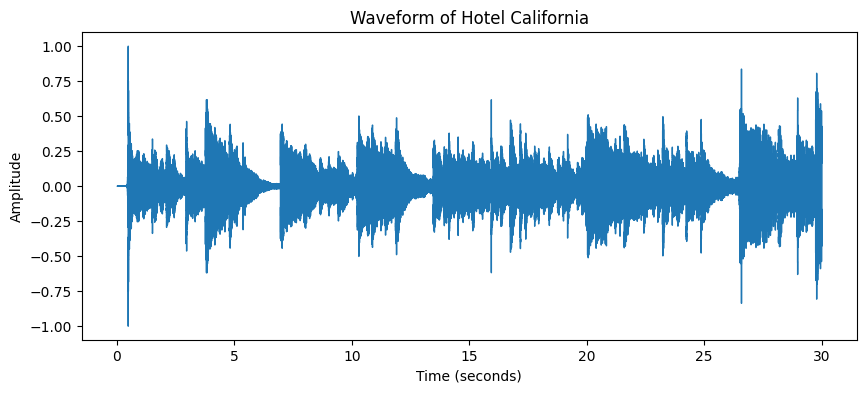

In [65]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of Hotel California')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

## Fourier Transform

- **Allows us to decompose signals (sound waves) into basic building blocks—sine waves of different frequencies.**
- It transforms a **time domain** signal into a **frequency domain** representation.

### Time Domain:
- The signal is represented as a **change in amplitude over time**, like the raw audio waveform.

### Frequency Domain:
- The signal is represented by its **constituent frequencies**, showing how much of each frequency is present in the signal.

- [Interactive guide to the Fourier Transform](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/)

### Limitation:
- The **Fourier Transform loses information about time**: it tells you **what frequencies** are present, but not **when** they occur in the signal.

---


## Short-Time Fourier Transform (STFT)

- **Extends the Fourier Transform** to handle signals whose frequency content changes over time by analyzing **small sections (windows)** of the signal at a time.
- Instead of analyzing the entire signal at once (like the Fourier Transform), **STFT divides the signal into overlapping windows** of fixed length.
- The Fourier Transform is applied to each window separately, capturing both **time** and **frequency** information.
- By sliding the window across the signal, **STFT captures how the frequency content changes over time**.

### Frequency Bins in STFT:
- **Frequencies are evenly spaced**. For example, analyzing frequencies between 0 Hz and 22 kHz, each frequency bin might be spaced by 100 Hz.
- All frequencies are treated equally, whether low or high.

### Example of Frequency Bins in STFT:
- 0 Hz, 100 Hz, 200 Hz, 300 Hz, ... up to 22,000 Hz
---


# Why Use Constant-Q Transform (CQT)?

- In **CQT**, frequencies are **logarithmically spaced**, meaning the spacing between frequency bins **gets wider as the frequencies get higher**.
- This is **how musical notes work**, as each **octave represents a doubling of frequency**.

### Example of Frequency Bins in CQT:
- 32 Hz (C1), 65 Hz (C2), 130 Hz (C3), 261 Hz (C4), 523 Hz (C5), etc.

- The spacing between low frequencies is narrow, but the spacing between high frequencies is wider.


In [40]:
# Compute Constant-Q Transform

def compute_cqt(y, sr, hop_size):
    # Compute the CQT (with default bins per octave = 12)
    C = librosa.cqt(y, sr=sr, hop_length=hop_size)
    # Convert the CQT to decibels for better visualization
    C_dB = librosa.amplitude_to_db(np.abs(C), ref=np.max)
    return C_dB # A CQT spectrogram matrix, where rows correspond to frequencies and columns correspond to time frames.

spectrogram = compute_cqt(y, sr, hop_size=512)  # 512 is default.
dim = spectrogram.shape
rows, cols = dim

rows,cols # total notes, frames


(84, 2813)

In [41]:
# Plot CQT
def plot_cqt(spectrogram, sr):
    plt.figure(figsize=(10, 6))
    # Use librosa's display functionality to plot the CQT
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='cqt_note', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Constant-Q Transform (CQT) Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()


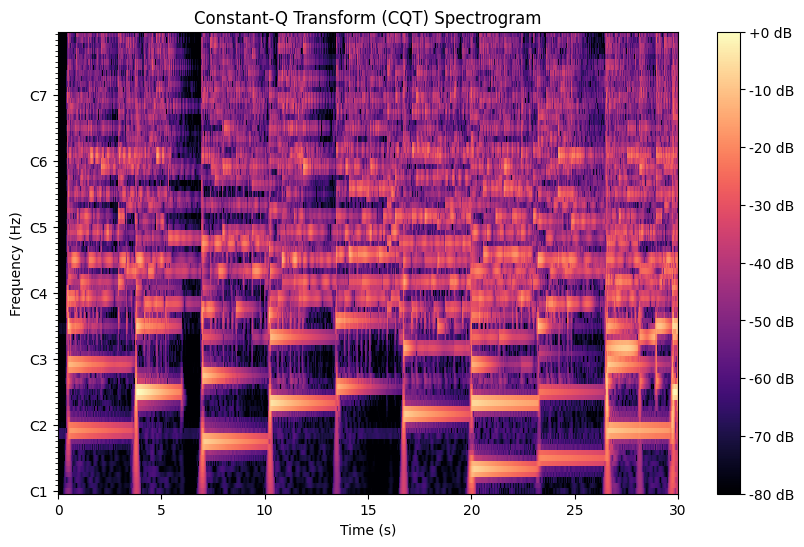

In [18]:
plot_cqt(spectrogram, sr)  

In [42]:
def reshape(spectrogram, n_timesteps):
    # Transpose CQT to match the (time_steps, features) format
    spectrogram = spectrogram.T  # Now each row is a time step, each column is a feature (frequency bin)
    # Split into sequences of n_timesteps
    X = []
    for i in range(0, len(spectrogram) - n_timesteps, n_timesteps):
        X.append(spectrogram[i:i+n_timesteps])
    X = np.array(X)
    return X

## Labeling Data

In [43]:
def load_raw_data(file_path):
    labels = []
    with open(file_path, 'r') as f:
        for line in f:
            start_time, end_time, chord = line.strip().split()
            labels.append((float(start_time), float(end_time), chord))
    return labels

fpath = 'Data/combined_lab_file.lab'
chord_annotations = load_raw_data(fpath)

for label in chord_annotations:
    print(f"Start: {label[0]}s, End: {label[1]}s, Chord: {label[2]}")

Start: 0.0s, End: 1.015s, Chord: N
Start: 1.015s, End: 4.155s, Chord: G:sus4(b7)
Start: 4.155s, End: 5.017s, Chord: G
Start: 5.017s, End: 5.853s, Chord: C
Start: 5.853s, End: 7.525s, Chord: G
Start: 7.525s, End: 9.232s, Chord: F
Start: 9.232s, End: 10.915s, Chord: G
Start: 10.915s, End: 11.774s, Chord: G
Start: 11.774s, End: 12.668s, Chord: C
Start: 12.668s, End: 14.375s, Chord: G
Start: 14.375s, End: 16.07s, Chord: F
Start: 16.07s, End: 17.788s, Chord: G
Start: 17.788s, End: 19.518s, Chord: C
Start: 19.518s, End: 21.213s, Chord: D
Start: 21.213s, End: 22.107s, Chord: G
Start: 22.107s, End: 22.955s, Chord: C
Start: 22.955s, End: 24.661s, Chord: G
Start: 24.661s, End: 25.532s, Chord: G
Start: 25.532s, End: 26.403s, Chord: C
Start: 26.403s, End: 28.075s, Chord: G
Start: 28.075s, End: 29.77s, Chord: F
Start: 29.77s, End: 31.534s, Chord: G
Start: 31.534s, End: 32.382s, Chord: G
Start: 32.382s, End: 33.241s, Chord: C
Start: 33.241s, End: 34.948s, Chord: G
Start: 34.948s, End: 36.654s, Chord

In [51]:
# Aligns CQT with chord annotations by extractingg corresponding CQT frames for reach chord time interval (column in spectrogram)
def align_cqt_with_chords(cqt, sr, hop_length, chord_annotations):
    """
    Args:
        cqt: The CQT spectrogram.
        sr (int): Sampling rate of the audio.
        hop_length (int): Hop length used in CQT computation.
        chord_annotations (list of tuples): List of (start_time, end_time, chord) from the .lab file.
    
    Returns:
        List of tuples: Each tuple contains a segment of the CQT and the corresponding chord label.
    """
    fps = sr / hop_length  # Compute how many frames represent one second
    aligned_chords = []
    print(fps)
    for start_time, end_time, chord in chord_annotations:
        # Convert start and end times to CQT frame indices
        start_frame = int(np.floor(start_time * fps))
        end_frame = int(np.ceil(end_time * fps))
        # Extract the relevant CQT frames and associate them with the chord label
        aligned_chords.append((cqt[:, start_frame:end_frame], chord))
    
    return aligned_chords

aligned_chord_segments = align_cqt_with_chords(spectrogram, sr=48000, hop_length=512, chord_annotations=chord_annotations)

# Print the first aligned segment and chord
print(f"CQT Segment Shape: {aligned_chord_segments[0][0].shape}, Chord: {aligned_chord_segments[0][1]}")


93.75
CQT Segment Shape: (84, 96), Chord: N


In [53]:
def get_note_from_cqt(cqt, bins_per_octave=12):
    """
    Maps the rows (frequency bins) of the CQT matrix to musical notes.
    
    Args:
        cqt (numpy.ndarray): The CQT spectrogram.
        bins_per_octave (int): Number of bins per octave in the CQT.
    
    Returns:
        List of frequencies corresponding to the rows of the CQT.
    """
    # Get the frequencies for each bin in the CQT matrix
    freqs = librosa.cqt_frequencies(cqt.shape[0], fmin=librosa.note_to_hz('C1'), bins_per_octave=bins_per_octave)
    
    # Map the frequencies to their closest musical notes
    notes = [librosa.hz_to_note(freq) for freq in freqs]
    
    return notes

# Example usage:
CQT_spectrogram = aligned_chord_segments[0][0]  # First CQT segment
notes = get_note_from_cqt(CQT_spectrogram)
print("Frequencies and Corresponding Notes for the First CQT Segment:")
for i, note in enumerate(notes):
    print(f"Frequency bin {i}: {note}")


Frequencies and Corresponding Notes for the First CQT Segment:
Frequency bin 0: C1
Frequency bin 1: C♯1
Frequency bin 2: D1
Frequency bin 3: D♯1
Frequency bin 4: E1
Frequency bin 5: F1
Frequency bin 6: F♯1
Frequency bin 7: G1
Frequency bin 8: G♯1
Frequency bin 9: A1
Frequency bin 10: A♯1
Frequency bin 11: B1
Frequency bin 12: C2
Frequency bin 13: C♯2
Frequency bin 14: D2
Frequency bin 15: D♯2
Frequency bin 16: E2
Frequency bin 17: F2
Frequency bin 18: F♯2
Frequency bin 19: G2
Frequency bin 20: G♯2
Frequency bin 21: A2
Frequency bin 22: A♯2
Frequency bin 23: B2
Frequency bin 24: C3
Frequency bin 25: C♯3
Frequency bin 26: D3
Frequency bin 27: D♯3
Frequency bin 28: E3
Frequency bin 29: F3
Frequency bin 30: F♯3
Frequency bin 31: G3
Frequency bin 32: G♯3
Frequency bin 33: A3
Frequency bin 34: A♯3
Frequency bin 35: B3
Frequency bin 36: C4
Frequency bin 37: C♯4
Frequency bin 38: D4
Frequency bin 39: D♯4
Frequency bin 40: E4
Frequency bin 41: F4
Frequency bin 42: F♯4
Frequency bin 43: G4
Frequ

In [ ]:
# Visualize the data to determine the number of nodes required in neural network.